Plotting
============================

This tutorial explains the high-level interface to plotting provided by the Bundle.  You are of course always welcome to access arrays and plot manually.

PHOEBE 2.3 uses [autofig 1.2](https://autofig.readthedocs.io/en/1.2.0) as an intermediate layer for highend functionality to [matplotlib](http://matplotlib.org).

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

This first line is only necessary for ipython noteboooks - it allows the plots to be shown on this page instead of in interactive mode.  Depending on your version of Jupyter, Python, and matplotlib - you may or may not need this line in order to see plots in the notebook.

In [2]:
%matplotlib inline

In [3]:
import phoebe
from phoebe import u # units
import numpy as np

logger = phoebe.logger()

First we're going to create some fake observations so that we can show how to plot observational data.  In real life, we would use something like [np.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to get arrays from a data file instead.

In [4]:
b = phoebe.default_binary()
b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,101))
b.run_compute(irrad_method='none')

times = b.get_value('times', context='model')
fluxes = b.get_value('fluxes', context='model') + np.random.normal(size=times.shape) * 0.01
sigmas = np.ones_like(times) * 0.05

100%|██████████| 101/101 [00:01<00:00, 64.36it/s]


Now we'll create a new Bundle and attach an orbit dataset (without observations) and a light curve dataset (with our "fake" observations - see [Datasets](datasets.ipynb) for more details):

In [5]:
b = phoebe.default_binary()
b.set_value('q', 0.8)
b.set_value('ecc', 0.1)
b.set_value('incl@orbit', 80)
b.set_value('irrad_method', 'none')

In [6]:
b.add_dataset('orb', compute_times=np.linspace(0,4,1000), dataset='orb01', component=['primary', 'secondary'])
b.add_dataset('lc', times=times, fluxes=fluxes, sigmas=sigmas, dataset='lc01')

<ParameterSet: 78 parameters | contexts: figure, dataset, compute, constraint>

And run a forward model.  See [Computing Observables](compute.ipynb) for more details.

In [7]:
b.run_compute(irrad_method='none')

100%|██████████| 1100/1100 [00:09<00:00, 115.53it/s]


<ParameterSet: 17 parameters | kinds: orb, lc>

Showing and Saving
-----------------------

**NOTE:** in IPython notebooks calling plot will display directly below the call to plot.  When not in IPython you have several options for viewing the figure:

- call [b.show](../api/phoebe.parameters.ParameterSet.show.md) or [b.savefig](../api/phoebe.parameters.ParameterSet.savefig.md) after calling [plot](../api/phoebe.parameters.ParameterSet.plot.md).
- use the returned autofig and matplotlib figures however you'd like
- pass `show=True` to the [plot](../api/phoebe.parameters.ParameterSet.plot.md) method.
- pass `save='myfilename'` to the [plot](../api/phoebe.parameters.ParameterSet.plot.md) method, which is the same as calling `plt.savefig('myfilename')`.

Default Plots
-----------------

To see the options for plotting that are dataset-dependent see the tutorials on that dataset method:

- [ORB dataset](ORB.ipynb)
- [MESH dataset](MESHipynb)
- [LC dataset](LC.ipynb)
- [RV dataset](RV.ipynb)
- [LP dataset](LP.ipynb)

By calling the [plot](../api/phoebe.parameters.ParameterSet.plot.md) method on the Bundle (or any ParameterSet) without any arguments, a plot or series of subplots will be built based on the contents of that ParameterSet.

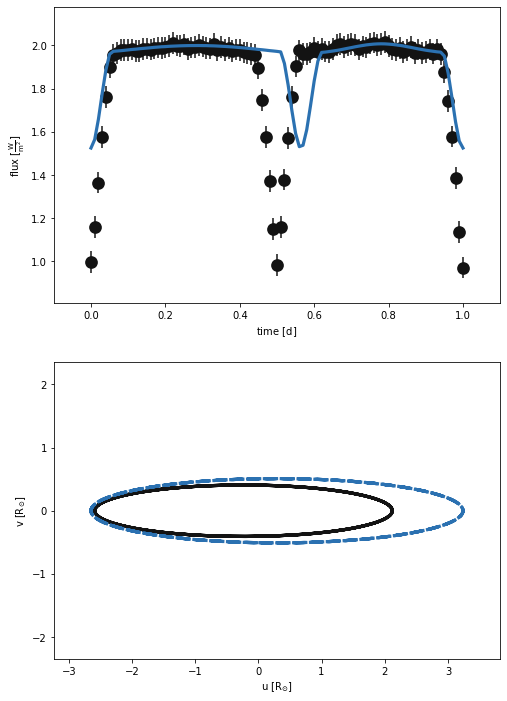

In [8]:
afig, mplfig = b.plot(show=True)

Any call to plot returns two objects - the autofig and matplotlib figure instances.  Generally we won't need to do anything with these, but having them returned could come in handy if you want to manually edit either before drawing/saving the image.

In this example with so many different models and datasets, it is quite simple to build a single plot by filtering the bundle and calling the plot method on the resulting ParameterSet.

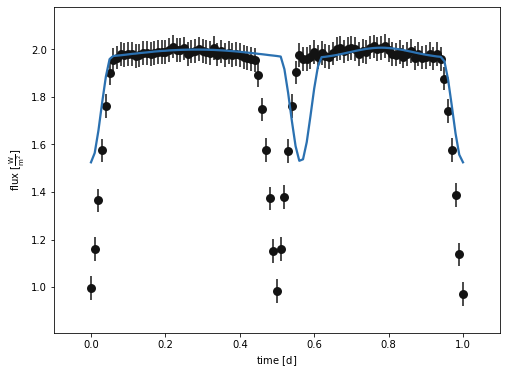

In [9]:
afig, mplfig = b.filter(dataset='lc01').plot(show=True)

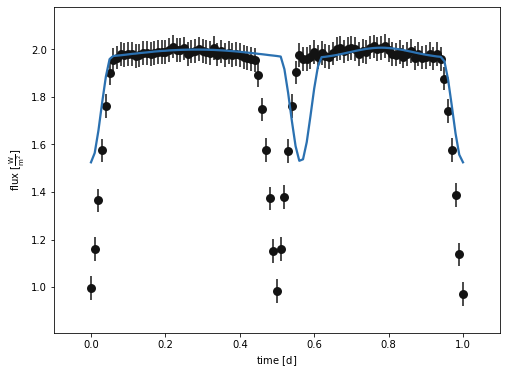

In [10]:
afig, mplfig = b.plot(dataset='lc01', show=True)

Selecting Arrays
--------------------

So far, each plotting call automatically chose default arrays from that dataset to plot along each axis.  To override these defaults, simply point to the qualifier of the array that you'd like plotted along a given axis.

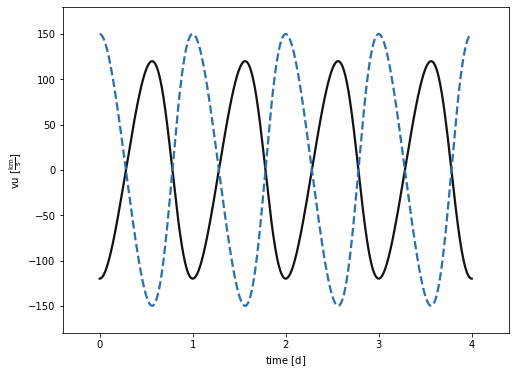

In [11]:
afig, mplfig = b.filter(dataset='orb01').plot(x='times', y='vus', show=True)

To see the list of available qualifiers that could be passed for x or y, call the qualifiers (or twigs) property on the ParameterSet.

In [12]:
b.filter(context='model', dataset='orb01').qualifiers

['times', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws']

For more information on each of the available arrays, see the relevant tutorial on that dataset method:

- [ORB dataset](ORB.ipynb)
- [MESH dataset](MESH.ipynb)
- [LC dataset](LC.ipynb)
- [RV dataset](RV.ipynb)
- [LP dataset](LP.ipynb)

### Selecting Phase

And to plot in phase we just send x='phases' or x='phases:binary'.

Setting x='phases' will use the ephemeris from the top-level of the hierarchy
(as if you called b.get_ephemeris()), whereas passing a string after the colon, 
will use the ephemeris of that component.

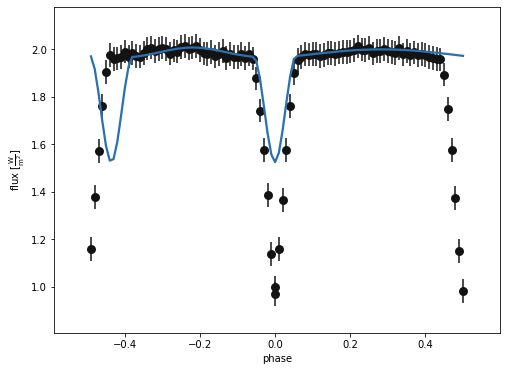

In [13]:
afig, mplfig = b.plot(dataset='lc01', x='phases', z=0, show=True)

Note that when plotting in phase, PHOEBE will automatically sort and connect points in phase-order when plotting against phase **if** the system is not time-dependent (see [b.hierarchy.is_time_dependent](../api/phoebe.parameters.HierarchyParameter.is_time_dependent.md)).  Otherwise, the points will be sorted and conencted in time-order - with breaks automatically applied to handle intelligent phase-wrapping.  In the vast majority of cases, this default behavior should make sense, but can always be overridden by passing 'times' or 'phases' to `i` (see the [plot API docs](../api/phoebe.parameters.ParameterSet.plot.md) for more details).

Next
----------

That's it for the forward model!  Next we'll get started discussing the inverse problem by introducing [distributions](./distributions.ipynb).

Or look at any of these advanced plotting topics:
* [Advanced: Plotting Options](plotting_advanced.ipynb)
* [Advanced: Animations](animations.ipynb)
* [Advanced: Accessing and Plotting Meshes](meshes.ipynb)